# SPAM SMS DETECTION

Spam SMS detection is the process of automatically identifying and filtering out unwanted text messages that are sent to mobile devices. These messages, commonly known as spam, often contain unsolicited advertisements, phishing attempts, scams, or other undesirable content. To achieve this, machine learning models analyze the content and metadata of incoming SMS messages to determine whether they are legitimate (ham) or spam, helping users avoid unwanted and potentially harmful messages.

##  Import Required Library 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from textblob import TextBlob
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

In [2]:
# read csv file
df= pd.read_csv("spam.csv",encoding = 'ISO-8859-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Information

In [4]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [5]:
# Drop unuse columns
df = df.drop(columns=df.columns[2:5])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Rename some columns
df.rename(columns={'v1': 'Category','v2': 'Message'}, inplace=True)


In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data preprocessing
Data preprocessing is a critical step in machine learning and data analysis. It involves cleaning, transforming, and preparing raw data to make it suitable for modeling. Common tasks include handling missing values, scaling features, encoding categorical variables, and splitting data into training and testing sets.

In [9]:
# Data cleaning and tokenization use regx function
import re

def preprocess_text(Message):
    text = re.sub(r'\W', ' ', Message)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', Message)  # Remove extra whitespace
    return Message.lower().strip()

df['Message'] = df['Message'].apply(preprocess_text)

In [10]:
df

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [11]:
# data shapw
df.shape

(5572, 2)

In [12]:
# find Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
# Find duplicate value
df.duplicated().sum()

415

In [14]:
# Drop duplicate value
df.drop_duplicates(inplace=True)

In [15]:
# Remove Duplicate value then Data shape
df.shape

(5157, 2)

In [16]:
# Remaove duplicate and null values then data infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [17]:
df.nunique()


Category       2
Message     5157
dtype: int64

## EDA
Exploratory Data Analysis (EDA) is the process of visually and statistically analyzing a dataset to understand its key characteristics, distribution, patterns, and relationships between variables. EDA helps data analysts gain insights and make informed decisions about subsequent data processing and modeling steps.

In [18]:
# Full information of Data
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  go until jurong point, crazy.. available only ...
1         ham                      ok lar... joking wif u oni...
2        spam  free entry in 2 a wkly comp to win fa cup fina...
3         ham  u dun say so early hor... u c already then say...
4         ham  nah i don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  this is the 2nd time we have tried 2 contact u...
5568      ham              will ì_ b going to esplanade fr home?
5569      ham  pity, * was in mood for that. so...any other s...
5570      ham  the guy did some bitching but i acted like i'd...
5571      ham                         rofl. its true to its name

[5157 rows x 2 columns]>

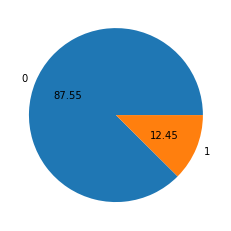

In [19]:
# to visualize nicely spam column
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['0','1'],autopct="%0.2f")
plt.show()

In [20]:
# How many are spam, and how many are ham
df['Category'].value_counts()

ham     4515
spam     642
Name: Category, dtype: int64

In [21]:
# Describe the Data
df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"go until jurong point, crazy.. available only ..."
freq,4515,1


<AxesSubplot:xlabel='Category', ylabel='count'>

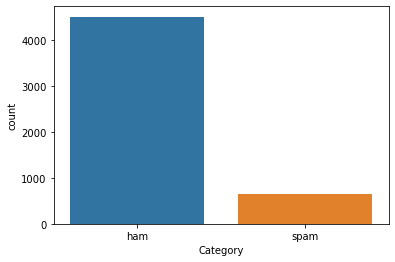

In [22]:
# Data visualize
sns.countplot(df['Category'])

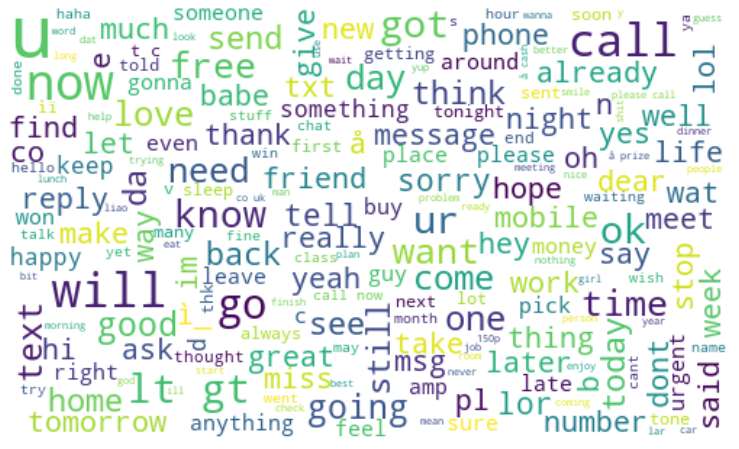

In [23]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Message']])

wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=50,background_color='white').generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear',)
plt.axis('off')
plt.show()

In [24]:
import nltk

In [25]:
# downloading dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Count the number of Charter
df['char_count']=df['Category'].apply(len)

In [27]:
# Count the number of Words
df['words_count']=df['Category'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
# Count the number of Sentence
df['sent_count']=df['Category'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Category,Message,char_count,words_count,sent_count
0,ham,"go until jurong point, crazy.. available only ...",3,1,1
1,ham,ok lar... joking wif u oni...,3,1,1
2,spam,free entry in 2 a wkly comp to win fa cup fina...,4,1,1
3,ham,u dun say so early hor... u c already then say...,3,1,1
4,ham,"nah i don't think he goes to usf, he lives aro...",3,1,1


In [30]:
# Encode the Category
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,char_count,words_count,sent_count,spam
0,ham,"go until jurong point, crazy.. available only ...",3,1,1,0
1,ham,ok lar... joking wif u oni...,3,1,1,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,4,1,1,1
3,ham,u dun say so early hor... u c already then say...,3,1,1,0
4,ham,"nah i don't think he goes to usf, he lives aro...",3,1,1,0
...,...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,4,1,1,1
5568,ham,will ì_ b going to esplanade fr home?,3,1,1,0
5569,ham,"pity, * was in mood for that. so...any other s...",3,1,1,0
5570,ham,the guy did some bitching but i acted like i'd...,3,1,1,0


In [31]:
# After Encodeing describe Data
df.describe()

,char_count,words_count,sent_count,spam
count,5157.000000,5157.0,5157.0,5157.000000
mean,3.124491,1.0,1.0,0.124491
std,0.330173,0.0,0.0,0.330173
min,3.000000,1.0,1.0,0.000000
25%,3.000000,1.0,1.0,0.000000
50%,3.000000,1.0,1.0,0.000000
75%,3.000000,1.0,1.0,0.000000
max,4.000000,1.0,1.0,1.000000


<AxesSubplot:>

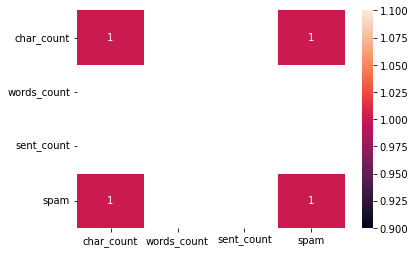

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
# Create a copy of the DataFrame and modify it
df_1 = df.copy()
# Create a copy of the 'message' column to avoid SettingWithCopyWarning
df_1['message'] = df_1['Message'].apply(lambda x: preprocess_text(x))

In [34]:
df_1['Category'] = df_1['Category'].map({'ham': 0, 'spam': 1})

## Spliting The Dataset

In [35]:
# Split the data into features (X) and labels (y)
X = df_1['message']  
y = df_1['Category']

In [37]:
from sklearnex.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Term Frequency-Inverse Document Frequency Method

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# TF-IDF Vectorization
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

## Lets Built The Model

## Naive Bayes Algo

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,make_scorer
# Multinomial Naive Bayes Model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [40]:
# Preprocess the test data and make predictions
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [42]:
accuracy

0.9486434108527132

In [43]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[902   0]
 [ 53  77]]


In [44]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       902
           1       1.00      0.59      0.74       130

    accuracy                           0.95      1032
   macro avg       0.97      0.80      0.86      1032
weighted avg       0.95      0.95      0.94      1032



## LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model=LogisticRegression()

In [46]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [48]:
Y_pred = model.predict(X_test_tfidf)

In [50]:
#find accuracy

acc=[]
roc=[]

ac=accuracy_score(y_test,Y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


Accuracy 0.9680232558139535 ROC 0.7961538461538462
